In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Importing the Direct Connections network

direct = pd.read_csv('Graphs/Data Tables Gephi/Connections - Direct Connections [Nodes].csv', encoding='ISO-8859-1')
print(len(direct))
print(direct.head())

4279
     id  label  timeset  degree  weighted degree  eccentricity  \
0  5025    NaN      NaN       3              3.0           2.0   
1  1874    NaN      NaN       3              3.0           2.0   
2  1137    NaN      NaN       5              5.0           1.0   
3  4753    NaN      NaN       3              3.0           2.0   
4  5458    NaN      NaN       1              1.0           1.0   

   closnesscentrality  harmonicclosnesscentrality  betweenesscentrality  \
0            0.714286                         0.8          0.000000e+00   
1            0.714286                         0.8          0.000000e+00   
2            1.000000                         1.0          6.558450e-07   
3            0.714286                         0.8          0.000000e+00   
4            1.000000                         1.0          0.000000e+00   

   modularity_class  pageranks  componentnumber  clustering  triangles  \
0                85   0.000228                0         1.0          3   

In [3]:
# Set the number of bins for ALL histograms

bins = 50

## Distributions of Direct Connections metrics

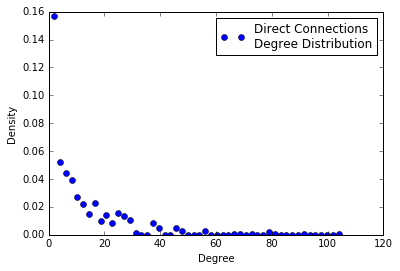

In [4]:
# Degree distribution

direct_degree_density = np.histogram(direct['degree'], bins = bins, density = True)[0]
a = np.histogram(direct['degree'], bins = bins, density = True)[1]

direct_degree = np.zeros(direct_degree_density.shape)
for i in range(direct_degree_density.shape[0]):
    direct_degree[i] = a[i] + (a[i+1] - a[i])/2
    
# Plot  

plt.plot(direct_degree, direct_degree_density, 'o', label = 'Direct Connections \nDegree Distribution')

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/direct_degree_dist.png')    

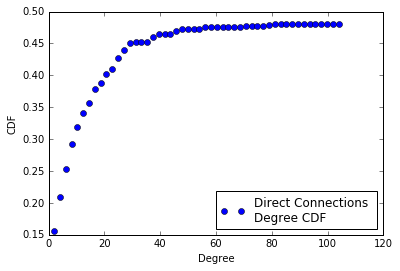

In [5]:
# Degree cdf

direct_cdf = np.cumsum(direct_degree_density)

# Plot

plt.plot(direct_degree, direct_cdf, 'o', label = 'Direct Connections \nDegree CDF')

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("CDF")

plt.savefig('Graphs/direct_degree_cdf.png')

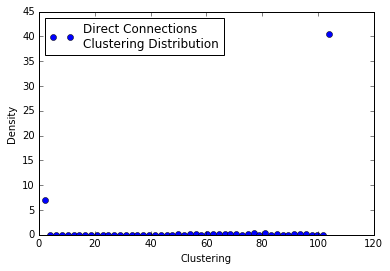

In [6]:
# Clustering distribution

direct_cluster_density = np.histogram(direct['clustering'], bins = bins, density = True)[0]
a = np.histogram(direct['clustering'], bins = bins, density = True)[1]

direct_cluster = np.zeros(direct_cluster_density.shape)
for i in range(direct_cluster_density.shape[0]):
    direct_cluster[i] = a[i] + (a[i+1] - a[i])/2
    
# Plot

plt.plot(direct_degree, direct_cluster_density, 'o', label = 'Direct Connections \nClustering Distribution')

plt.legend(loc='best')
plt.xlabel("Clustering")
plt.ylabel("Density")

plt.savefig('Graphs/direct_degree_cluster.png')    

## Erdos-Renyi Random Graph G(n, p)

In [24]:
# Set p and compute mu

p = 0.001
mu = (len(direct)-1) * p
print('mu =', round(mu, 2))

mu = 4.28


In [25]:
# Degree distribution

ER_degree = list(range(bins))
ER_degree_density = poisson.pmf(ER_degree, mu)

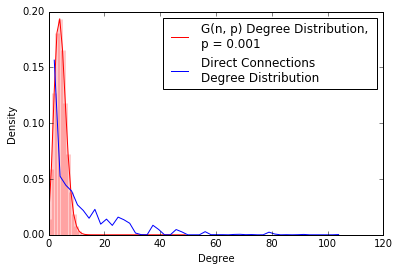

In [28]:
# Plot Direct and Model degree distributions 

ER_label = 'G(n, p) Degree Distribution, \np = ' + str(p)
plt.plot(ER_degree, ER_degree_density, color = 'r', label = ER_label)
plt.vlines(ER_degree, 0, ER_degree_density, colors='r', lw=5, alpha=0.2)

direct_label = 'Direct Connections \nDegree Distribution'
plt.plot(direct_degree, direct_degree_density, label = direct_label)

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/direct_degree_dist_ER.png')

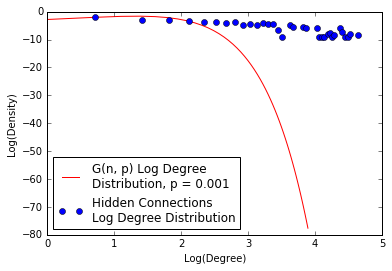

In [29]:
# Plot Direct and Model LOG degree distributions 

ER_log_label = 'G(n, p) Log Degree \nDistribution, p = ' + str(p)
plt.plot(np.log(ER_degree), np.log(ER_degree_density), color = 'r', label = ER_log_label)

direct_log_label = 'Hidden Connections \nLog Degree Distribution'
plt.plot(np.log(direct_degree), np.log(direct_degree_density), 'o', label = direct_log_label)

plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/direct_degree_dist_log_ER.png')

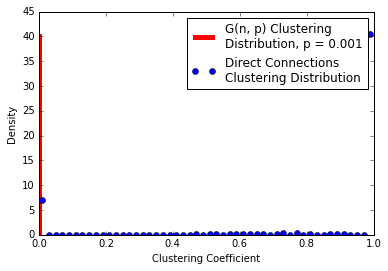

In [31]:
# Plot Direct and Model degree distributions 

ER_cluster_label = 'G(n, p) Clustering \nDistribution, p = ' + str(p)
plt.plot((p, p), (0, 40), 'r', linewidth = 5, label = ER_cluster_label)

direct_cluster_label = 'Direct Connections \nClustering Distribution'
plt.plot(direct_cluster, direct_cluster_density, 'o', label = direct_cluster_label)

plt.legend(loc='best')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Density")

plt.savefig('Graphs/direct_clustering_dist_ER.png')

## Preferential Attachment

In [32]:
# Set the number of links in added in a period (m) and the number of periods (t)
# t is equal to the number of nodes
# m is half the average degree since the total degree is 2tm

t = len(direct)
m = direct['degree'].mean() / 2
print('t =', t)
print('m =', round(m, 2))

t = 4279
m = 5.69


In [33]:
# Degree distribution

j = np.array(list(range(len(direct)))) + 1
dj = m * (t / j)**0.5

PA_degree_density = np.histogram(dj, bins = bins, density = True)[0]
a = np.histogram(dj, bins = bins, density = True)[1]

PA_degree = np.zeros(PA_degree_density.shape)
for i in range(PA_degree_density.shape[0]):
    PA_degree[i] = a[i] + (a[i+1] - a[i])/2

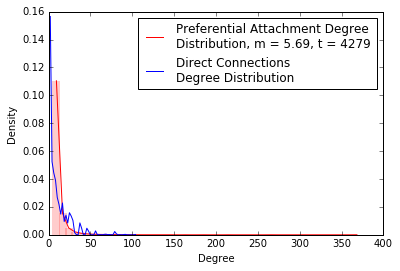

In [35]:
# Plot Direct and Model degree distributions 

PA_label = 'Preferential Attachment Degree \nDistribution, m = ' + str(round(m, 2)) + ', t = ' + str(t)
plt.plot(PA_degree, PA_degree_density, color = 'r', label = PA_label)
plt.vlines(PA_degree, 0, PA_degree_density, colors='r', lw=8, alpha=0.2)

direct_label = 'Direct Connections \nDegree Distribution'
plt.plot(direct_degree, direct_degree_density, label = direct_label)

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/direct_degree_dist_PA.png')

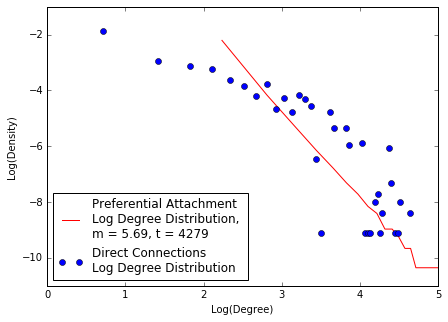

In [36]:
# Plot Direct and Model LOG degree distributions 

plt.figure(figsize = (7,5))

PA_log_label = 'Preferential Attachment \nLog Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t)
plt.plot(np.log(PA_degree), np.log(PA_degree_density), color = 'r', label = PA_log_label)

direct_log_label = 'Direct Connections \nLog Degree Distribution'
plt.plot(np.log(direct_degree), np.log(direct_degree_density), 'o', label = direct_log_label)

plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/direct_degree_dist_log_PA.png')

In [37]:
# Run a linear regression on Direct Connections degree distribution

lr = LinearRegression()
direct_degree_lr = np.log(direct_degree)[np.isinf(np.log(direct_degree_density)) == False].reshape(-1,1)
direct_degree_density_lr = np.log(direct_degree_density)[np.isinf(np.log(direct_degree_density)) == False].reshape(-1,1)
lr.fit(direct_degree_lr, direct_degree_density_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

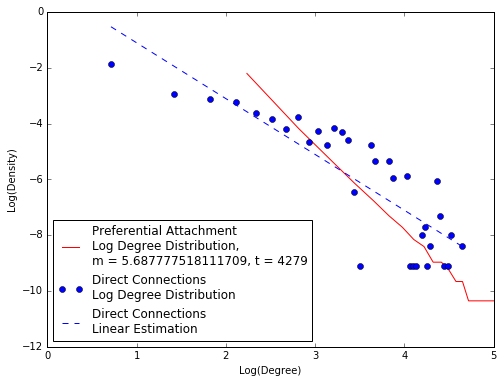

In [38]:
# Plot Direct and Model LOG degree distributions with Linear Regression

plt.figure(figsize = (8,6))

PA_log_label = 'Preferential Attachment \nLog Degree Distribution, \nm = ' + str(m) + ', t = ' + str(t)
plt.plot(np.log(PA_degree), np.log(PA_degree_density), color = 'r', label = PA_log_label)

direct_log_label = 'Direct Connections \nLog Degree Distribution'
plt.plot(np.log(direct_degree), np.log(direct_degree_density), 'o', label = direct_log_label)

plt.plot(direct_degree_lr, lr.predict(direct_degree_lr), 'b--', label = 'Direct Connections \nLinear Estimation')

plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/direct_degree_dist_log_PA_regression.png')

## Simple Hybrid

In [135]:
# Set the m & t for Preferential attachment, and PICK the fraction of growing uniformly at random (a)

a = 0.9999

t = len(direct)
m = direct['degree'].mean() / 2
print('a =', a)
print('t =', t)
print('m =', round(m, 2))

a = 0.9999
t = 4279
m = 5.69


In [136]:
# Degree distribution

j = np.array(list(range(len(direct)))) + 1
dj_H = (m + 2*a*m / (1-a)) * (t / j)**((1-a)/2) - 2*a*m / (1-a)

H_degree_density = np.histogram(dj_H, bins = bins, density = True)[0]
b = np.histogram(dj_H, bins = bins, density = True)[1]

H_degree = np.zeros(H_degree_density.shape)
for i in range(H_degree_density.shape[0]):
    H_degree[i] = b[i] + (b[i+1] - b[i])/2

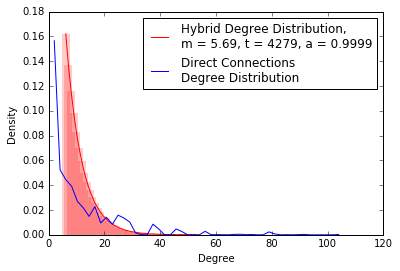

In [137]:
# Plot Direct and Model degree distributions 

H_label = 'Hybrid Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t) + ', a = ' + str(a)
plt.plot(H_degree, H_degree_density, color = 'r', label = H_label)
plt.vlines(H_degree, 0, H_degree_density, colors='r', lw=8, alpha=0.2)

direct_label = 'Direct Connections \nDegree Distribution'
plt.plot(direct_degree, direct_degree_density, label = direct_label)

plt.legend(loc='upper right')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/direct_degree_dist_H.png')

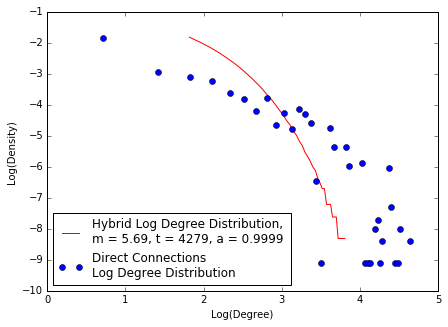

In [138]:
# Plot Hidden and Model LOG degree distributions 

plt.figure(figsize = (7,5))

H_log_label = 'Hybrid Log Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t) + ', a = ' + str(a)
plt.plot(np.log(H_degree)[:-8], np.log(H_degree_density)[:-8], 'r', label = H_log_label)

hidden_log_label = 'Direct Connections \nLog Degree Distribution'
plt.plot(np.log(direct_degree), np.log(direct_degree_density), 'o', label = direct_log_label)

plt.xlim([0,5])
plt.legend(loc='lower left')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/direct_degree_dist_log_H.png')

### Hybrid Model: Estimating $a$

In [139]:
# Creating a vector of a_0

a = np.linspace(0, 1, 21)
a = np.delete(a, len(a)-1)
b = np.linspace(0.99, 0.999999, 11)
a = np.append(a, b)
print('Vector of a_0 =', a)

Vector of a_0 = [ 0.         0.05       0.1        0.15       0.2        0.25       0.3
  0.35       0.4        0.45       0.5        0.55       0.6        0.65
  0.7        0.75       0.8        0.85       0.9        0.95       0.99
  0.9909999  0.9919998  0.9929997  0.9939996  0.9949995  0.9959994
  0.9969993  0.9979992  0.9989991  0.999999 ]


In [132]:
# Estimating a

a_est_list = np.zeros(len(a))
const_est_list = np.zeros(len(a))
const_derived_list = np.zeros(len(a))

for i in range(len(a)):
    log_kind_of_d = np.log(direct_degree + 2 * a[i] * m / (1-a[i])).reshape(-1,1)
    log_kind_of_cdf 
    
    = np.log(1 - direct_cdf).reshape(-1,1)

    lr = LinearRegression(fit_intercept = True)
    lr.fit(log_kind_of_d, log_kind_of_cdf)

    a_est = 1 + 2 / lr.coef_[0][0]
    const_derived = a_est * np.log(m + m * (a_est - 2))

    a_est_list[i] = a_est
    const_est_list[i] = lr.intercept_[0]
    const_derived_list[i] = const_derived

In [133]:
a_est_list.round(2)

array([-14.7 , -14.14, -13.63, -13.15, -12.69, -12.23, -11.77, -11.31,
       -10.83, -10.33,  -9.81,  -9.26,  -8.67,  -8.02,  -7.3 ,  -6.5 ,
        -5.57,  -4.47,  -3.13,  -1.4 ,   0.44,   0.49,   0.55,   0.6 ,
         0.66,   0.71,   0.77,   0.83,   0.88,   0.94,   1.  ])

In [134]:
const_est_list

array([ -1.11486729e-01,  -9.09595632e-02,  -7.04238065e-02,
        -4.93133700e-02,  -2.71487064e-02,  -3.45659411e-03,
         2.22850161e-02,   5.06991892e-02,   8.25732199e-02,
         1.18947755e-01,   1.61254407e-01,   2.11542577e-01,
         2.72876317e-01,   3.50075332e-01,   4.51210357e-01,
         5.90933799e-01,   7.98942914e-01,   1.14592912e+00,
         1.85063809e+00,   4.06875042e+00,   2.47289981e+01,
         2.78257809e+01,   3.17475482e+01,   3.68637726e+01,
         4.37989144e+01,   5.36950717e+01,   6.88794212e+01,
         9.49063569e+01,   1.48935856e+02,   3.20671108e+02,
         5.56705602e+05])

In [59]:
const_derived_list

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])